In [24]:
%matplotlib nbagg
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [35]:
#########################################################################
### This file is used to generate Figure 4 in the paper
###
### Tight bounds on the mutual coherence of sensing matrices
### for Wigner D-functions on regular grid - Arya Bangun, Arash Behboodi
### and Rudolf Mathar 
###
### Created by Arya Bangun
#########################################################################
import matplotlib.pyplot as plt
import numpy as np
import os
from grad_algorithms import GradientAlgorithms
from metric import BoundCoherence, params
from matrix import Matrix
from samplingsphere import SamplingPoints
from storedata import StoreData
types = ['snf','all']
sampling = ['gradient', types[1]]

B = 16
N, col_comb = params(types, B)
m = np.arange(50,N,35).astype(np.int64) # Samples

## Preallocation Samples
#ang_graddes = np.zeros((N, len(m)), dtype = np.float64)
#ang_adam = np.copy(ang_graddes)
#ang_adadelta = np.copy(ang_graddes)
#ang_adagrad = np.copy(ang_graddes)


## Preallocation Coherence
#coh_graddes = np.zeros(len(m), dtype = np.float64);
#coh_adam = np.copy(graddes)
#coh_adadelta = np.copy(graddes)
#coh_adagrad = np.copy(graddes)
#legbound = np.copy(graddes)
#welchbound = np.copy(graddes)

## Parameters Gradient
eps = 1e-4
max_iter = 100

## Store data
storepath = os.path.join(os.getcwd(), types[0] + types[1])
savedata = StoreData(m = m, N = N, path = storepath )

In [36]:
m

array([ 50,  85, 120, 155, 190, 225, 260, 295, 330, 365, 400, 435, 470,
       505, 540, 575])

In [4]:
for ii in range(len(m)):
    
    ## Generate samples
    angles = SamplingPoints(m = m[ii],types = sampling).angles
    
    ## Generate Matrix
    matrix = Matrix(B = B,
                    types = types,
                    angles = angles)
    ## Gradient
    gr_algo = GradientAlgorithms(matrix = matrix, eps = eps,
                                 max_iter = max_iter, col_comb = col_comb)
    
    ## Generate bound
    Bound = BoundCoherence(m[ii],N,B) # Generate the Bound in the main theorem
    
    
    ## Store Data
    savedata.coh_angle_handle(ii = ii, gr_algo = gr_algo, bound = Bound)
    
    ## Calculate gradient
   # coh_grades[ii] = gr_algo.graddes_coh # use simple gradient descent
   # ang_grades[0:self.m[ii], ii] = gr_algo.graddes_ang    
   # print("GrDe     -- Samples %s, Coherence  %s,  Welch Bound %s, and Legendre Bound %s" %(m[ii],ang_all_graddes,Bound[0], Bound[1])) 
   # 
   # coh_adam[ii] = gr_algo.adam_coh # use adam 
   # ang_adam[0:self.m[ii], ii] = gr_algo.adam_ang
   # print("ADAM     -- Samples %s, Coherence  %s,  Welch Bound %s, and Legendre Bound %s" %(m[ii],ang_all_adam,Bound[0], Bound[1]))
   # 
   # coh_adadelta[ii] = gr_algo.adadelta_coh # use adadelta
   # ang_adadelta[0:self.m[ii], ii] = gr_algo.adadelta_ang
   # print("AdaDelta -- Samples %s, Coherence  %s,  Welch Bound %s, and Legendre Bound %s" %(m[ii],ang_all_adadelta,Bound[0], Bound[1]))   
   # 
   # coh_adagrad[ii] = gr_algo.adagrad_coh # use adagrad
   # ang_adagrad[0:self.m[ii], ii] = gr_algo.adagrad_ang
  #  print("AdaGrad  -- Samples %s, Coherence  %s,  Welch Bound %s, and Legendre Bound %s" %(m[ii],ang_all_adagrad,Bound[0], Bound[1]))
                    
 

GrDe     -- Samples 17, Coherence  0.6280481676292059,  Welch Bound 0.1969733436855183, and Legendre Bound 0.24138419353977386
ADAM     -- Samples 17, Coherence  0.6330069726188381,  Welch Bound 0.1969733436855183, and Legendre Bound 0.24138419353977386
AdaDelta -- Samples 17, Coherence  0.6419982314109802,  Welch Bound 0.1969733436855183, and Legendre Bound 0.24138419353977386
AdaGrad  -- Samples 17, Coherence  0.6304376721382141,  Welch Bound 0.1969733436855183, and Legendre Bound 0.24138419353977386
GrDe     -- Samples 25, Coherence  0.6100595593452454,  Welch Bound 0.1399087848746689, and Legendre Bound 0.17035513299239113
ADAM     -- Samples 25, Coherence  0.5452913641929626,  Welch Bound 0.1399087848746689, and Legendre Bound 0.17035513299239113
AdaDelta -- Samples 25, Coherence  0.6118341684341431,  Welch Bound 0.1399087848746689, and Legendre Bound 0.17035513299239113
AdaGrad  -- Samples 25, Coherence  0.4903255121250658,  Welch Bound 0.1399087848746689, and Legendre Bound 0.17

In [5]:
import scipy.io as sio
path = os.path.join(storepath,os.listdir(storepath)[0])    

In [6]:
load_data = sio.loadmat(path)

In [13]:
angle = load_data.get('AdaGrad')

In [16]:
angle = angle[1,0:m[1],0:2]

In [21]:
angle

array([[1.57079631, 4.90346675],
       [1.57327054, 0.88543255],
       [1.59958228, 2.05473076],
       [1.10391375, 3.98508871],
       [1.57079633, 3.34698162],
       [1.37767946, 3.2146198 ],
       [2.08075282, 0.82928141],
       [1.57048752, 3.69678264],
       [1.57079641, 4.27405005],
       [0.89018957, 4.58995971],
       [2.0838941 , 4.75501156],
       [1.57079669, 5.62245008],
       [1.83358505, 3.25132756],
       [1.79477121, 2.41770785],
       [1.57079633, 1.35667772],
       [1.71447954, 4.48457708],
       [1.5703411 , 5.06521338],
       [2.25484577, 1.1767141 ],
       [1.56995813, 3.5495418 ],
       [2.18185271, 2.33665383],
       [1.70864483, 4.6769196 ],
       [1.59956058, 2.43078138],
       [1.74859601, 2.24716844],
       [0.88539956, 0.34806575],
       [1.05713773, 4.58603009]])

In [18]:
xx = np.sin(angle[:,0])*np.cos(angle[:,1])
yy = np.sin(angle[:,0])*np.sin(angle[:,1])
zz = np.sin(angle[:,1])

In [23]:
print(xx,yy,zz)

[ 0.18991716  0.63295275 -0.46507266 -0.59369981 -0.97898173 -0.97879507
  0.5894711  -0.84980027 -0.42443603 -0.09491341  0.03712275  0.78954124
 -0.95986095 -0.73052423  0.21248625 -0.22351923  0.34554956  0.29757743
 -0.91793606 -0.5677236  -0.03512555 -0.75751933 -0.6160997   0.72774437
 -0.10975998] [-0.98180012  0.77418647  0.88480451 -0.66702796 -0.20394796 -0.07160595
  0.6436178  -0.52710474 -0.90545793 -0.77137369 -0.8704368  -0.61369751
 -0.10575509  0.64575757  0.97716406 -0.96412446 -0.93840039  0.71561429
 -0.39672747  0.59035613 -0.98989092  0.6521789   0.76755465  0.26405335
 -0.86400881] [-0.98180012  0.77418884  0.88517122 -0.74697205 -0.20394796 -0.07296226
  0.73744622 -0.52710476 -0.90545793 -0.99251489 -0.9990918  -0.61369751
 -0.10951481  0.66230031  0.97716406 -0.9741629  -0.93840049  0.92334934
 -0.39672761  0.72078824 -0.99937103  0.65244879  0.77984879  0.34108018
 -0.99202733]


In [9]:
Coherence = load_data.get('Coherence')


<IPython.core.display.Javascript object>


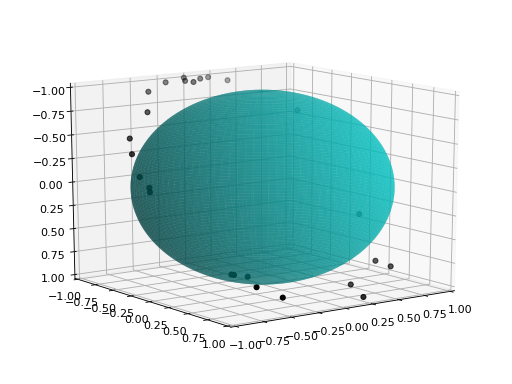

In [20]:
import matplotlib.pyplot as plt
from matplotlib import cm, colors
from mpl_toolkits.mplot3d import Axes3D
 

# Create a sphere
r = 1
pi = np.pi
cos = np.cos
sin = np.sin
phi, theta = np.mgrid[0.0:pi:100j, 0.0:2.0*pi:100j]
x = r*sin(phi)*cos(theta)
y = r*sin(phi)*sin(theta)
z = r*cos(phi)

#Import data
#data = np.genfromtxt('leb.txt')
#xx, yy, zz = np.hsplit(data, 3) 

#Set colours and render
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.plot_surface(
    x, y, z,  rstride=1, cstride=1, color='c', alpha=0.6, linewidth=0)

ax.scatter(xx,yy,zz,color="k",s=20)

ax.set_xlim([-1,1])
ax.set_ylim([-1,1])
ax.set_zlim([-1,1])
#ax.set_aspect("equal")
plt.tight_layout()

<IPython.core.display.Javascript object>


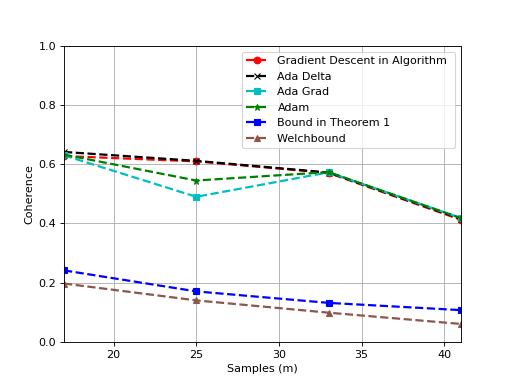

In [10]:


plt.figure(2)
plt.plot(m,Coherence[0,:], color = 'r', marker = 'o', linestyle = '--',linewidth = 2, label = 'Gradient Descent in Algorithm ')
#plt.hold(True)
plt.grid(True)
plt.plot(m,Coherence[2,:], color = 'k', marker = 'x', linewidth = 2, linestyle = '--', label = 'Ada Delta')
plt.plot(m,Coherence[3,:], color = 'c', marker = 's', linestyle = '--', linewidth = 2, label = 'Ada Grad')
plt.plot(m,Coherence[1,:], color = 'g', marker = '*', linewidth = 2, linestyle = '--', label = 'Adam')
plt.plot(m,Coherence[4,:], color = 'b', marker = 's', linewidth = 2, linestyle = '--', label = 'Bound in Theorem 1')
plt.plot(m,Coherence[5,:], color = 'tab:brown', marker = '^', linewidth = 2, linestyle = '--', label = 'Welchbound ')
plt.xlim(m[0],m[len(m)-1])
plt.ylim(0,1)
plt.legend()
plt.xlabel('Samples (m)')
plt.ylabel('Coherence')
plt.show()



In [6]:
a =  np.random.rand(4,4)*100

array([[4.87400991e+01, 4.22379506e+01, 7.54014916e+01, 9.82892989e+01],
       [3.56042393e+01, 8.37236722e+01, 3.79720507e+01, 4.09059865e+00],
       [1.32902654e+01, 3.48262816e+01, 2.87494428e+00, 3.50539788e+00],
       [7.94843929e-02, 9.15956409e+01, 1.03674418e+01, 3.85870440e+00]])

<IPython.core.display.Javascript object>


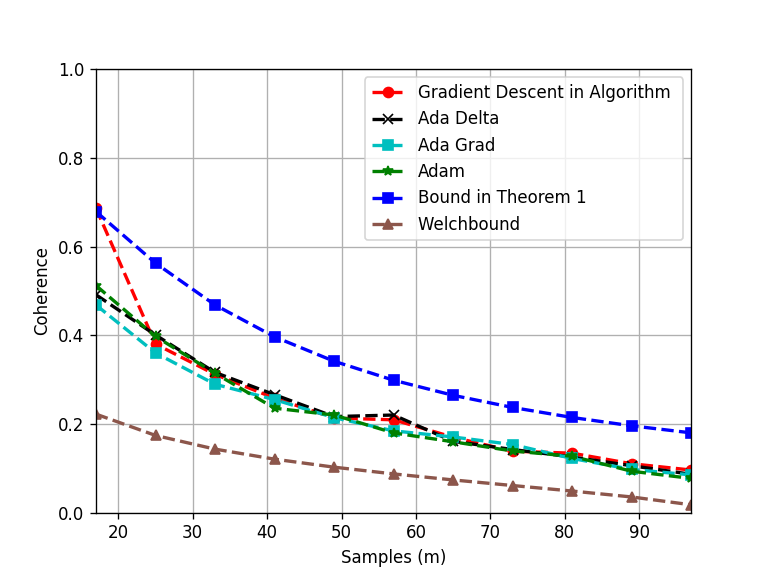

In [4]:


plt.figure(1)
plt.plot(m,graddes, color = 'r', marker = 'o', linestyle = '--',linewidth = 2, label = 'Gradient Descent in Algorithm ')
#plt.hold(True)
plt.grid(True)
plt.plot(m,adadelta, color = 'k', marker = 'x', linewidth = 2, linestyle = '--', label = 'Ada Delta')
plt.plot(m,adagrad, color = 'c', marker = 's', linestyle = '--', linewidth = 2, label = 'Ada Grad')
plt.plot(m,adam, color = 'g', marker = '*', linewidth = 2, linestyle = '--', label = 'Adam')
plt.plot(m,legbound, color = 'b', marker = 's', linewidth = 2, linestyle = '--', label = 'Bound in Theorem 1')
plt.plot(m,welchbound, color = 'tab:brown', marker = '^', linewidth = 2, linestyle = '--', label = 'Welchbound ')
plt.xlim(m[0],m[len(m)-1])
plt.ylim(0,1)
plt.legend()
plt.xlabel('Samples (m)')
plt.ylabel('Coherence')
plt.show()



In [3]:
a = np.zeros(100)
tes = {"a": a, "label": "experiment"}

In [4]:
tes

{'a': array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
 'label': 'experiment'}